In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [161]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e8/train.csv',index_col="id")
test_df = pd.read_csv('/kaggle/input/playground-series-s3e8/test.csv',index_col="id")

In [162]:
train_df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [163]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 16.2+ MB


In [164]:
train_df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [165]:
train_df.shape

(193573, 10)

In [166]:
train_df.describe()

,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


In [167]:
train_df["x"] = train_df["x"].replace(0,train_df["x"].mean())
test_df["x"] = test_df["x"].replace(0,test_df["x"].mean())
train_df["y"] = train_df["y"].replace(0,train_df["y"].mean())
test_df["y"] = test_df["y"].replace(0,test_df["y"].mean())
train_df["z"] = train_df["z"].replace(0,train_df["z"].mean())
test_df["z"] = test_df["z"].replace(0,test_df["z"].mean())

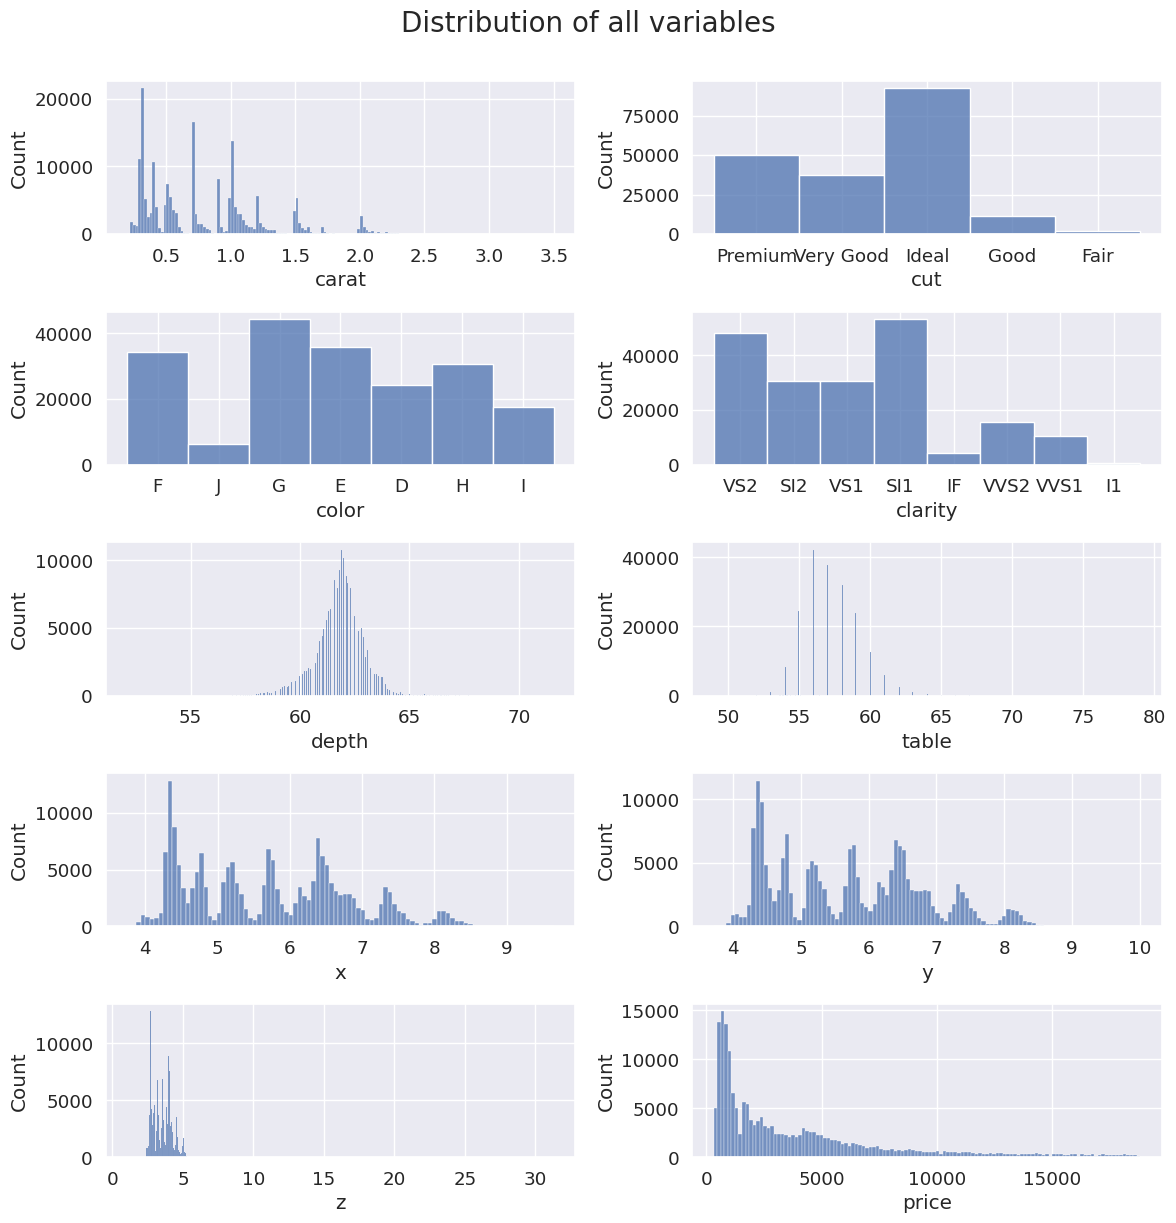

In [168]:
ncols = 2
nrows = np.ceil(len(train_df.columns)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(train_df.columns, axs.flatten()):
    sns.histplot(train_df, x=c, ax=ax)
fig.suptitle('Distribution of all variables', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])

<AxesSubplot:xlabel='price', ylabel='Count'>

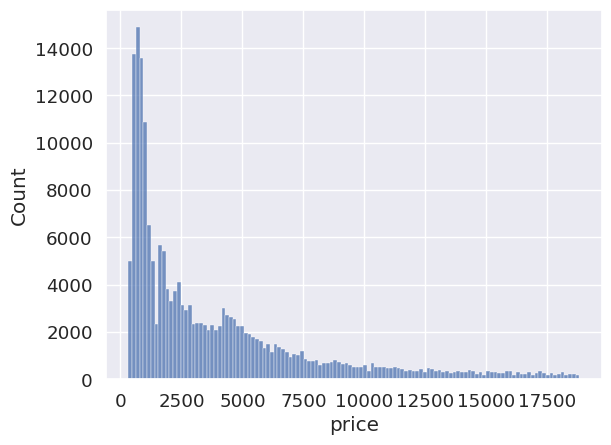

In [169]:
TARGET = "price"
sns.histplot(train_df[TARGET])

<AxesSubplot:xlabel='log_price', ylabel='Count'>

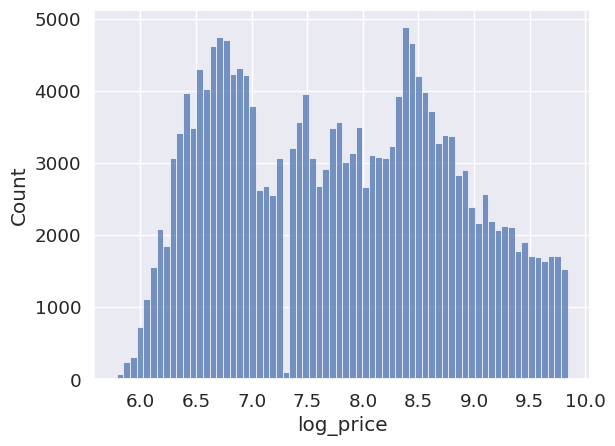

In [170]:
train_df['log_price'] = np.log(train_df[TARGET])
train_df.drop('price',axis=1,inplace=True)
TARGET = "log_price"
sns.histplot(train_df[TARGET])

In [171]:
numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index
print("Numerical: ", len(numerical_feats))

categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index
print("Categorical: ", len(categorical_feats))

Numerical:  7
Categorical:  3


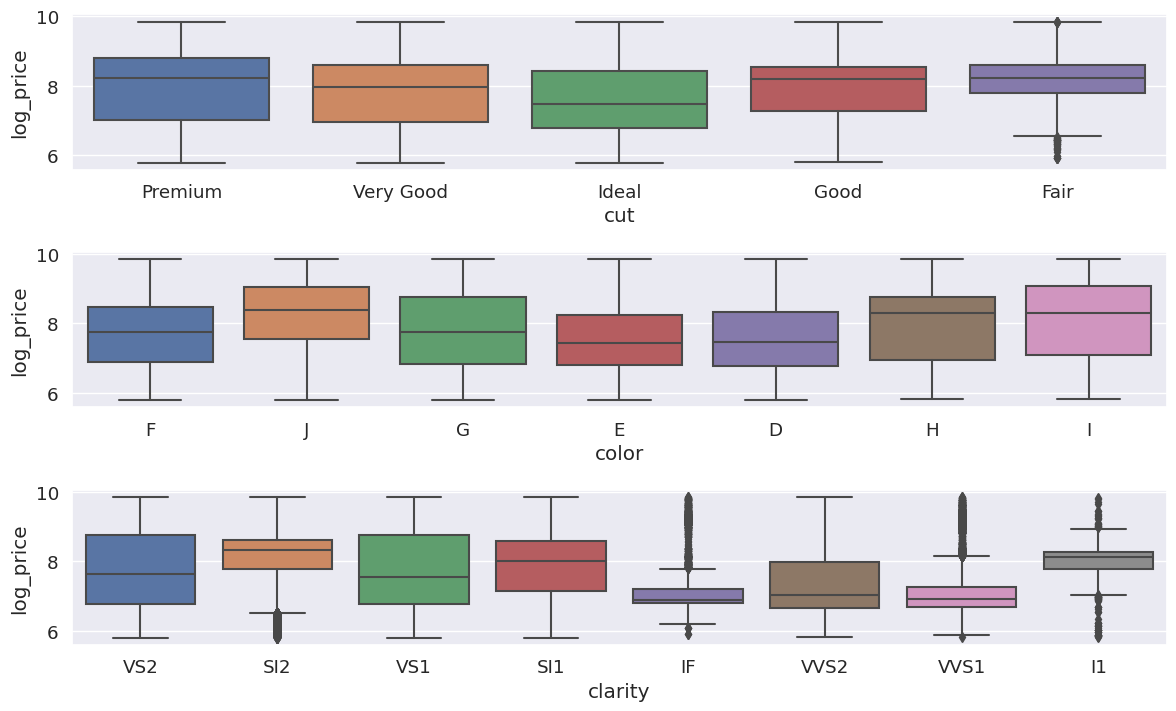

In [172]:
ncols = 1
nrows = np.ceil(len(categorical_feats)/ncols).astype(int)
fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,nrows*2.5))
for c, ax in zip(categorical_feats, axs.flatten()):
    sns.boxplot(data=train_df, x=c, y=TARGET ,ax=ax)
plt.tight_layout(rect=[0, 0, 1, 0.98])

In [187]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]
test = test_df

In [189]:
from sklearn.preprocessing import LabelEncoder
l = len(X)
df = pd.concat([X,test_df])
df['color'].replace({'D': 0, 'E': 1,'F': 2, 'G': 3,'H': 4, 'I': 5, 'J': 6},inplace=True)
df['clarity'].replace({'FL':0, 'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8, 'I2':9, 'I3':10 },inplace=True)
df['cut'].replace({'Fair':0, 'Good':1, 'Very Good':2, 'Premium':3, 'Ideal':4}, inplace=True)
X = df[:l]
test = df[l:]

In [190]:
columns = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y','z']

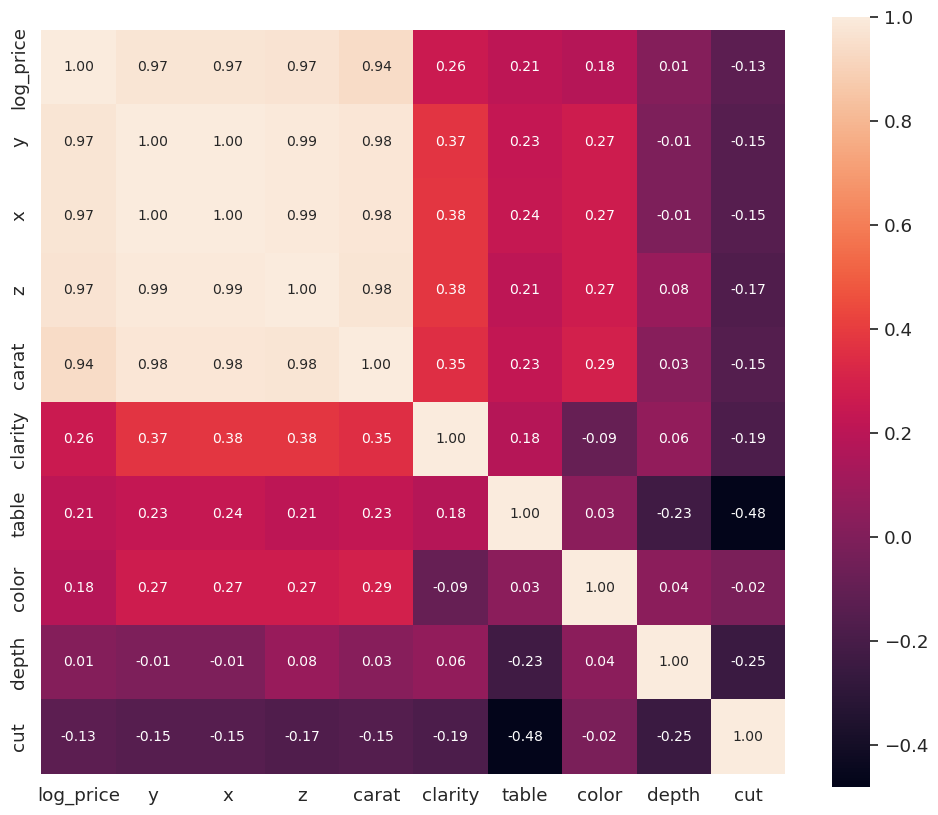

In [191]:
X = X[columns]
k = 15 # number of variables for heatmap
df = pd.concat([X,y],axis=1)
corrmat = df.corr()
cols = corrmat.nlargest(k, TARGET)[TARGET].index
cm = np.corrcoef(df[cols].values.T)
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(font_scale=1.2,font="IPAexGothic")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [192]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cat
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [200]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,random_state=0)

In [201]:
xgb_params = {
        'objective': 'reg:squarederror',
        'seed':42,
        'n_estimators':20000,
        'learning_rate':0.1,
        
        }
model_xgb = xgb.XGBRegressor(**xgb_params)
model_xgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              early_stopping_rounds=100,
              verbose=100)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-rmse:6.62613	validation_1-rmse:6.62906
[100]	validation_0-rmse:0.10258	validation_1-rmse:0.10372
[200]	validation_0-rmse:0.10024	validation_1-rmse:0.10312
[300]	validation_0-rmse:0.09878	validation_1-rmse:0.10300
[400]	validation_0-rmse:0.09761	validation_1-rmse:0.10302
[417]	validation_0-rmse:0.09737	validation_1-rmse:0.10302


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=20000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

In [202]:
lgb_params = {
        'objective': 'regression',
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'learning_rate':0.1,
        'task': 'train', 
        'seed':42,
        'n_estimators':20000,
        
}
model_lgb = lgb.LGBMRegressor(**lgb_params)
model_lgb.fit(X_train,
              y_train,
              eval_set=[(X_train, y_train),(X_valid, y_valid)],
              verbose=100,
              early_stopping_rounds=100)

/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	training's rmse: 0.104198	valid_1's rmse: 0.103855
[200]	training's rmse: 0.102317	valid_1's rmse: 0.103103
[300]	training's rmse: 0.101146	valid_1's rmse: 0.102943
[400]	training's rmse: 0.100177	valid_1's rmse: 0.10289
[500]	training's rmse: 0.0993575	valid_1's rmse: 0.102901
[600]	training's rmse: 0.098608	valid_1's rmse: 0.10289


LGBMRegressor(metric='rmse', n_estimators=20000, objective='regression',
              seed=42, task='train')

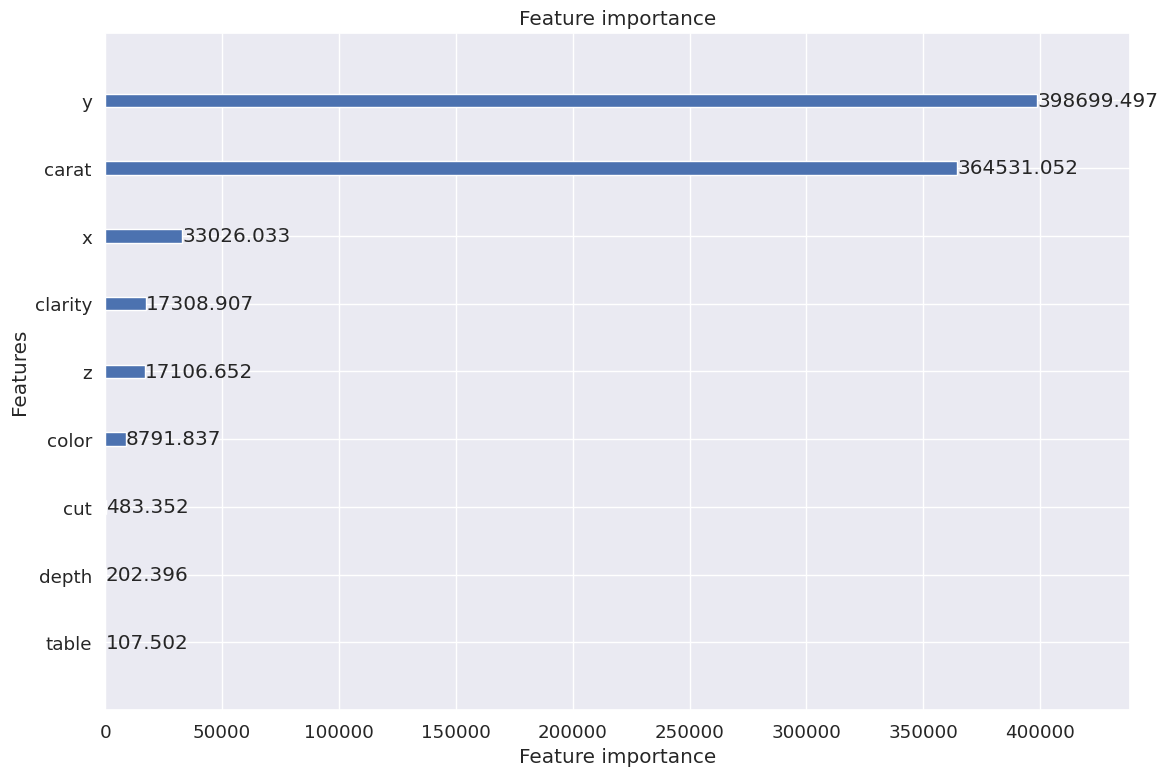

In [203]:
lgb.plot_importance(model_lgb, figsize=(12,8), max_num_features=50, importance_type='gain')
plt.tight_layout()
plt.show()
plt.close()

In [204]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e8/sample_submission.csv')
sub

,id,price
0,193573,3969.155
1,193574,3969.155
2,193575,3969.155
3,193576,3969.155
4,193577,3969.155
...,...,...
129045,322618,3969.155
129046,322619,3969.155
129047,322620,3969.155
129048,322621,3969.155


In [209]:
y_xgb = model_xgb.predict(test)
y_pred_xgb_true = np.exp(y_xgb)
sub['price'] = y_pred_xgb_true
sub.to_csv('/kaggle/working/xgb8.csv',index=False)

In [210]:
y_lgb = model_lgb.predict(test)
y_pred_lgb_true = np.exp(y_lgb)
sub['price'] = y_pred_lgb_true
sub.to_csv('/kaggle/working/lgb8.csv',index=False)